In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Naïve-Bayes:
### What is a classifier?
A classifier is a machine learning model that is used to discriminate different objects based on certain features

### Principle of Naive Bayes Classifier:
A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. 

A probabilistic classifier can predict given observation by using a probability distribution over a set of classes and based on that distribution it will predict the most likely class that the observation should belong to.

Naive Bayes classification is a probabilistic approach to classify the data set based on the Bayes Theorem of probability.

## Key terms in Naive Bayes classification:
<br>
<li>Prior probability,</li> 
<li>Posterior Probability,</li> 
<li>Likelihood probability, and </li>
<li>Evidence probability.</li>


Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

The variable y is the class variable (type of wine), which represents if it is suitable to predict the type of the wine. Based on the Variable X represent the parameters/features.


<b>Bayes Formula</b>:  P(c/x)= P(x/c)*P(c) /  P(x)

<li>P(c/x) = P(x1/c) * P(x2/c) * P(x3/c) * ....... * P(Xn/c)</li>

<li>P(c/x) is the posterior probability of class c given predictor ( features).</li>
<li>P(c) is the probability of class.</li>
<li>P(x/c) is the likelihood which is the probability of predictor given class.</li>
<li>P(x) is the prior probability of predictor.This term is ignored in this implementation since it doesn't affect which class distribution the sample is most likely to belong to.</li>


## Here x_1,x_2….x_n represent the features, i.e they can be mapped to: 
" 	1) Alcohol"	
" 	2) Malic acid"	
" 	3) Ash"	
"	4) Alcalinity of ash  "	
" 	5) Magnesium"	
"	6) Total phenols"	
" 	7) Flavanoids"	
" 	8) Nonflavanoid phenols"	
" 	9) Proanthocyanins"	
"	10)Color intensity"	
" 	11)Hue"	
" 	12)OD280/OD315 of diluted wines"	
" 	13)Proline            "	


By substituting for X and expanding using the chain rule we get,
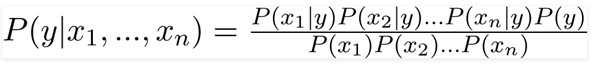

Now, you can obtain the values for each by looking at the dataset and substitute them into the equation. For all entries in the dataset, the denominator does not change, it remains static. Therefore, the denominator can be removed, and a proportionality can be introduced.
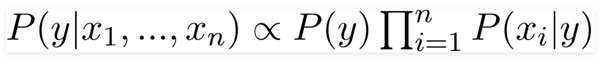


In our case, the class variable(y) has only three outcomes whether the wine type is (1,2,3) which is known as multivariate(multi-class-prediction). Therefore, we need to find the class y with maximum probability.
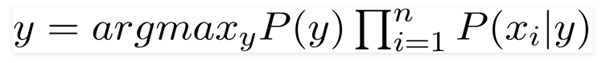

Using the above function, we can obtain the class, given the predictors.
the formula for Likelihood probability (conditional probability) changes to,
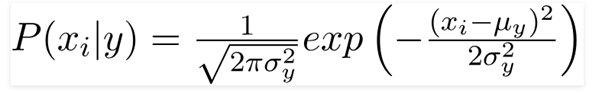

In [5]:
df=pd.read_csv("wine.csv",names=["Wine","Alchol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total Phenols",
                                 "Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue",
                                 "Diluted wined","Proline"])

In [6]:
df.head()

,Wine,Alchol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wined,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## we need to calculate probability of class

In [7]:
# Count of each class
df["Wine"].groupby(df["Wine"]).count()

Wine
1    59
2    71
3    48
Name: Wine, dtype: int64

## Calculate prior probability

In [8]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [9]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
sc=StandardScaler()
X=df.iloc[:,1:]
X=sc.fit_transform(np.array(X))
Y=df.iloc[:,0]
Y=np.array(Y)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

## Calculate prior probability

In [11]:
def caclulate_prior_proba(y):
    
    proba=np.mean(y_train==y)
     
    return proba 

In [12]:
caclulate_prior_proba(y=1)

0.31451612903225806

## Caclculate mean and var of all the columns with respect to no.of classes 

In [13]:
# total no.of columns is 13
mean={}
var={}
for i,y in enumerate(np.unique(Y)):
    
    k=x_train[y_train==y].mean(axis=0)
    k1=x_train[y_train==y].var(axis=0)
    mean[i+1]=k
    var[i+1]=k1

## likelihood
## here we have total three classes which means wine types(1,2,3)

In [14]:
def likelihood(mean,var,x):
     
    # gausssian likelihood of x given mean and variance
    first= 1/np.sqrt(2*np.pi*np.power(var,2))
    second= np.exp(-np.power((x-mean),2)/(2*np.power(var,2)))
    gaussian=first*second
    
    return gaussian    

In [15]:
likelihood(mean[1],var[1],x_train[0])

array([0.04473043, 1.32768077, 0.56416683, 0.36912623, 0.26520965,
       0.05972838, 0.00196231, 1.24292533, 0.67174966, 1.03838704,
       1.00850918, 0.05284399, 0.5256533 ])

In [16]:
classes=np.unique(Y)

In [17]:
def classify(samplex):
    
    posterior=[]
    
    for j in np.unique(Y):
        
        prior = caclulate_prior_proba(j)
        
        for sample,m,v in zip(samplex,mean[j],var[j]):
            
           
            
            like_hood=likelihood(m,v,sample)
            prior *= like_hood
    
        posterior.append(prior)  
    
    return classes[np.argmax(posterior)]


In [18]:
x_train[0]

array([ 1.71625494, -0.4186237 ,  0.30515936, -1.46987817, -0.26270834,
        0.32829793,  0.49267693, -0.49840699,  0.6817379 ,  0.08301456,
        0.2744305 ,  1.36768901,  1.72952002])

In [19]:
classify(x_train[0])

1

In [20]:
def predict(X):
        """ Predict the class labels of the samples in X """
        y_pred = [classify(sample) for sample in X]
        return y_pred

In [21]:
y_predict=np.array(predict(x_test))

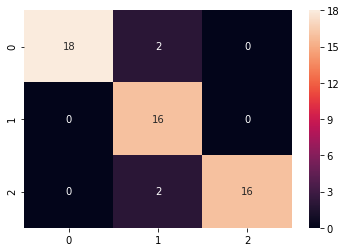

In [22]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_predict)
sns.heatmap(c,annot=True,fmt='d')

## accuracy score of test data

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9259259259259259

## accuracy score of train data

In [24]:
y_pred=np.array(predict(x_train))

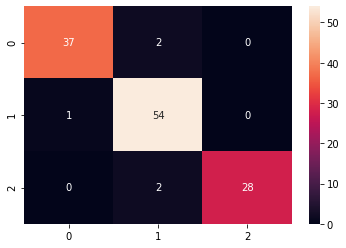

In [25]:
c=confusion_matrix(y_train,y_pred)
sns.heatmap(c,annot=True,fmt='d')

In [26]:
accuracy_score(y_train,y_pred)

0.9596774193548387

## Naive-Bayes from sklearn

In [27]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
sc=StandardScaler()

In [28]:
X=df.iloc[:,1:]
X=sc.fit_transform(np.array(X))

In [29]:
Y=df.iloc[:,0]
Y=np.array(Y)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
model=GaussianNB()

In [33]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
y_p=model.predict(x_test)

## accuracy_score test data

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_p)

1.0

Text(0.5, 1, 'confusion matix of test data')

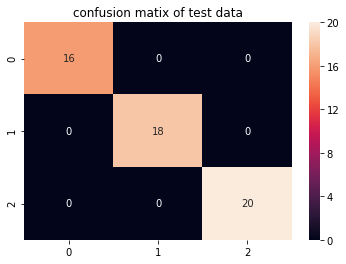

In [36]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_p)
sns.heatmap(c,annot=True,fmt='d')
plt.title("confusion matix of test data")

## predicting the train data and find the accuracy of train data

In [37]:
y_p1=model.predict(x_train)

In [38]:
from sklearn.metrics import accuracy_score
print("accuracy_score of train_data",accuracy_score(y_train,y_p1))

accuracy_score of train_data 0.9758064516129032


Text(0.5, 1, 'confusion matrix train data')

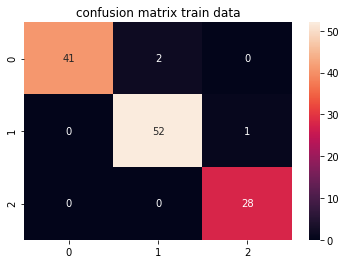

In [39]:
c=confusion_matrix(y_train,y_p1)
sns.heatmap(c,annot=True,fmt='d')
plt.title("confusion matrix train data")